# ELEG 6318-P01 - Final Project Covid 19 Recognition with CNN

- Goal: To compare different convolutional neural networks in identirying covid 19 from medical imagery

- CNN 3 Structure: CONV1(16, (3\*3))-Relu1-Maxpooling1(2\*2)-Dropout1(0.25)-CONV2(32, (3\*3)) - CONV3(32,(3*3))
-Relu2-Maxpooling2(2*2)-Dropout2(0.25)-Dense(512)-Relu3- Dropout3(0.5)-Output(Softmax)

In [ ]:
#import packages
from __future__ import print_function
import keras
#from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
# package for plotting and formatting 
import matplotlib.pyplot as plt
import os
#package calculate training time 
import time
# packages for recall, precision score, Fscore etc 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [ ]:
#load data from drive 
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# loading training and test data as numpy files 
#import numpy files 
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/Final Project /x_train.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/Final Project /y_train.npy')
x_test = np.load('/content/drive/MyDrive/Colab Notebooks/Final Project /x_test.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/Final Project /y_test.npy')

In [ ]:
# setting hyper-parameters
batch_size = 32
num_classes = 10
epochs = 10

In [ ]:
# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples \n')

print('y_train shape:',y_train.shape)
print(y_train.shape[0], 'train samples')
print(y_test.shape[0],'test samples')
print(x_test.shape,y_test.shape)

x_train shape: (300, 224, 224, 3)
300 train samples
50 test samples 

y_train shape: (300,)
300 train samples
50 test samples
(50, 224, 224, 3) (50,)


In [ ]:
# Convert class vectors to binary class matrices.
# For example, for three classes, [0,0,1] -> 0, [0,1,0] -> 1, [1,0,0] -> 2 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#building a CNN model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#preprocessing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalization
x_train /= 255
x_test /= 255

In [ ]:
#Training
starttime = time.time()
#fit the model 
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

endtime = time.time()


Epoch 1/10
10/10 [==============================] - 12s 165ms/step - loss: 1.1345 - accuracy: 0.7533 - val_loss: 0.5749 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 1s 74ms/step - loss: 0.5074 - accuracy: 0.8333 - val_loss: 0.4715 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 1s 79ms/step - loss: 0.4824 - accuracy: 0.8333 - val_loss: 0.4468 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 1s 83ms/step - loss: 0.4828 - accuracy: 0.8333 - val_loss: 0.4427 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 1s 81ms/step - loss: 0.4592 - accuracy: 0.8333 - val_loss: 0.4678 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 1s 80ms/step - loss: 0.4731 - accuracy: 0.8333 - val_loss: 0.4268 - val_accuracy: 0.8400
Epoch 7/10
10/10 [==============================] - 1s 76ms/step - loss: 0.4499 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.8400
Epoch 8/10


In [ ]:
#predict 
ypred = model.predict(x_test)

#convert predictions to classes 
yclass = np.argmax(ypred,axis=1)
y_ptest = np.argmax(y_test, axis =1)

accuracy = accuracy_score(y_ptest,yclass)
print('Accuracy:',accuracy)
precision = precision_score(y_ptest, yclass, average='weighted', zero_division=0)
print('Precision:',precision)
recall = recall_score(y_ptest,yclass,average='weighted')
print('Recall:',recall)
f_score = f1_score(y_ptest,yclass, average='weighted',zero_division=0)
print('f score', f_score)

2/2 [==============================] - 0s 16ms/step
Accuracy: 0.86
Precision: 0.8394326241134753
Recall: 0.86
f score 0.8321144024514809


In [ ]:
# Testing.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

print('training time (seconds) :', endtime - starttime)


2/2 [==============================] - 0s 17ms/step - loss: 0.4640 - accuracy: 0.8600
Test loss: 0.4640384614467621
Test accuracy: 0.8600000143051147
training time (seconds) : 19.49249529838562


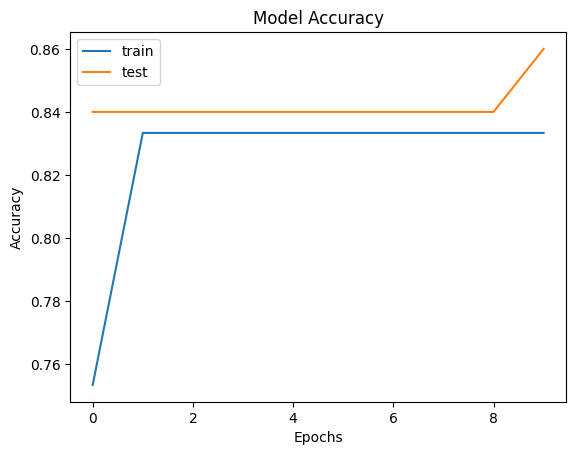

In [ ]:
#Plotting accuracies and formatting 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend (['train','test'])

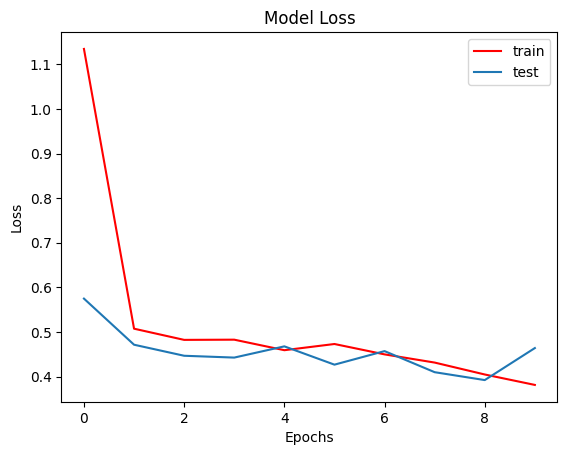

In [ ]:
#plotting losses and formatting 
plt.plot(history.history['loss'], color = 'red')
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend (['train','test'])